In [19]:
import pandas as pd
import numpy as np
import random
from scipy.stats import bernoulli
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns



# Exemplos de probabilidades

In [2]:
#probabilidade de eventos independentes
random.choice(["boy", "girl"])


'girl'

In [3]:
#probabilidade de eventos dependentes
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(random.random())

for _ in range(10000):
    younger = random.choice(["boy", "girl"])
    older = random.choice(["boy", "girl"])
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print ("P(both | older):", both_girls / older_girl)
print ("P(both | either): ", both_girls / either_girl)
# 0.514 ~ 1/2
# 0.342 ~ 1/3

P(both | older): 0.49780701754385964
P(both | either):  0.3332888414308596


# Exemplos de distribuições de probabilidade

In [12]:
from scipy.stats import uniform

n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)


fig = go.Figure(data=[go.Histogram(x=data_uniform)])
fig.show()

In [13]:
from scipy.stats import norm
data_normal = norm.rvs(size=10000,loc=0,scale=1)

fig = go.Figure(data=[go.Histogram(x=data_normal)])
fig.show()

In [14]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)
fig = go.Figure(data=[go.Histogram(x=data_binom)])
fig.show()

In [15]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)
fig = go.Figure(data=[go.Histogram(x=data_bern)])
fig.show()

In [26]:
from scipy.stats import poisson
data_poisson = poisson.rvs(size=10000,mu=0.6)
fig = go.Figure(data=[go.Histogram(x=data_poisson)])
fig.show()

# Calcula Probabilidade de um evento dado uma distribuição

In [55]:
#loc = media
#scale = std
data_normal = norm.rvs(size=10000,loc=0,scale=1)
prob = norm(0, 1).cdf(2) - norm(0,1).cdf(0.5)
prob

0.2857874067778077

# Distribuição Normal
* Observação da Dispersão

           0
0  86.721606
1  86.717827
2  91.291773
3  88.274649
4  92.882298
                  0
count  10000.000000
mean      90.007064
std        2.011765
min       82.308556
25%       88.637343
50%       90.007413
75%       91.357037
max       98.766492
Mediana
0    90.007413
dtype: float64


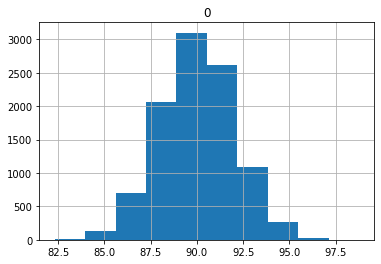

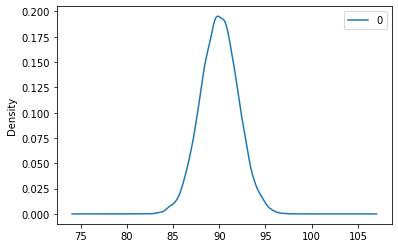

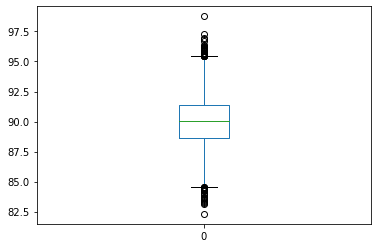

In [20]:
values= np.random.normal(90,2, 10000)
df = pd.DataFrame(values)
print(df.head())
print(df.describe())
print("Mediana")
print(df.median())
df.hist()
df.plot.density()
df.plot.box()

0.2857874067778077

In [32]:
df

,0
0,86.721606
1,86.717827
2,91.291773
3,88.274649
4,92.882298
...,...
9995,89.278850
9996,89.054952
9997,89.094798
9998,91.194912


# Teste de Hipótese
* Verificando se distribuição é normal

In [34]:
from scipy.stats import normaltest

stat, p = normaltest(df[0])

alpha = 0.05
print('Teste=%.3f, p=%.3f' % (stat, p))

# interpretando o resultado do teste
if p > alpha:
    print('falha para rejeitar H0 - Distribuição é normal')
else:
    print('Consegui rejeitar H0 - Distribuição não é normal')


Teste=0.420, p=0.811
falha para rejeitar H0


# Correlação

In [36]:
titanicdata = pd.read_csv('titanic_tratado.csv')
titanicdata.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
print(titanicdata['Survived'].corr(titanicdata['Sex']))
print(titanicdata['Survived'].corr(titanicdata['Age']))

-0.5433513806577555
-0.06980851528714314


In [49]:
correlacao=titanicdata.corr(method ='pearson')

In [50]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

In [51]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(df_to_plotly(correlacao)))
fig.show()